Ben Kahan  
DS 210  
Homework 4. 
12 October 2022  
Collaborators: None

# Question 1

For standard `*.txt` files, I use `vim` or `nano` to edit them. However, for `Rust`, I will be using Intellij with the `Rust` plugin.  

For version control, I use `git` and GitHub to store my private repositories. 

For example: 

```bash
git init 
mkdir "homework4"
git add homework4/
git commit -m "hw4 dir initial"
cd homework4/ 
vim example.txt # edit the file using vim commands
git add example.txt 
git commit -m "example.txt initial"
git push origin main 
```

# Question 2

In [35]:
%%bash 
rustc --version

rustc 1.64.0 (a55dd71d5 2022-09-19)


In [36]:
%%bash 
cargo --version

cargo 1.64.0 (387270bc7 2022-09-16)


For Jupyter, I installed the Rust Jupyter kernel from Google

# Question 3

In [131]:
from sklearn.tree import DecisionTreeRegressor, export_text
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [132]:
samples = 100
x = np.sort(np.random.rand(1,samples))

In [164]:
mse_reg = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=6) # depreciated but I haven't updated my system
mae_reg = DecisionTreeRegressor(criterion='mae', max_leaf_nodes=6)

mse_reg = DecisionTreeRegressor(criterion='squared-error', max_leaf_nodes=6)
mae_reg = DecisionTreeRegressor(criterion='absolute-error', max_leaf_nodes=6)

In [165]:
def f(x): 
    return 1 / (1 + np.exp(-x))

In [167]:
mse_reg.fit(x.reshape(-1,1), f(x))
mae_reg.fit(x.reshape(-1,1), f(x))

/usr/local/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mae', max_leaf_nodes=6)

In [169]:
x_test = np.linspace(0,1,num=75)

In [174]:
mse_pred = mse_reg.predict(x_test.reshape(-1,1))
mae_pred = mae_reg.predict(x_test.reshape(-1,1))

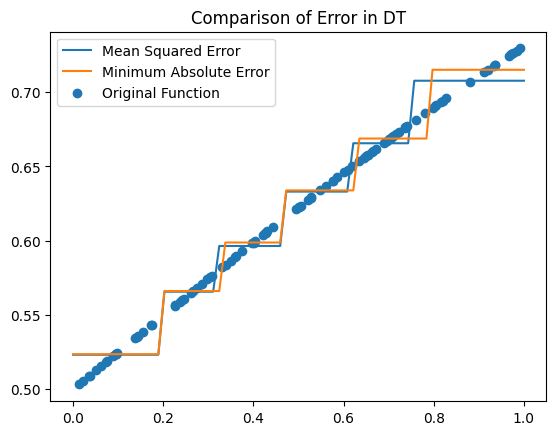

In [179]:
plt.plot(x_test, mse_pred, label = "Mean Squared Error")
plt.plot(x_test, mae_pred, label = "Minimum Absolute Error")
plt.scatter(x, f(x), label = "Original Function")
plt.title("Comparison of Error in DT")
plt.legend()

The two plots show how the two error predictors diverge. This makes sense given the way these two decision trees handle error. The MSQ reduces the error along mean of it's output space such that the squared differences are reduced.  

The differes from th MAE, where MAE reduces the overall error between the predicted data and the input space.  



# Question 4

In [103]:
x = np.sort(np.random.rand(1,samples).ravel())

In [104]:
def f(x):
    return (np.random.rand()*np.float_power(x,13) + \
            np.random.rand()*np.float_power(x,-.5) + \
            np.random.rand()* np.cos(x) - \
            .5 * np.random.rand() * \
            np.random.normal(size=samples) \
            ).ravel()

In [105]:
y = f(x)

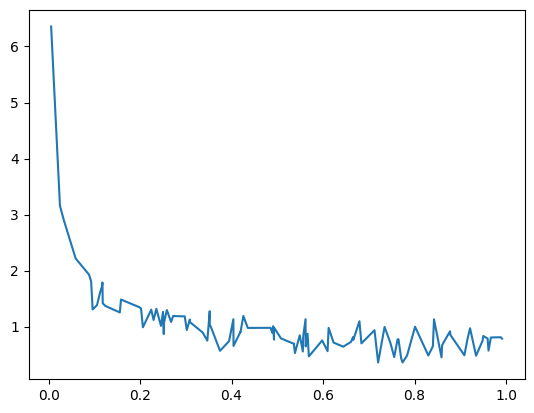

In [106]:
plt.plot(x,y)

In [107]:
def eval_poly(c,x):
    y = np.zeros_like(x)
# What does this inner loop do? 
# ANS: This innerloop indexes for every entry in c
# since c, in this context, is the result of numpy.polyfit(),
# the method returns a numpy array with the indicies representing
# the coefficients of the fit polynomial 
# thus, the for loop separates each coefficient and: 
# y = y*x, multiplies itself (y) by x and adds the coefficient 
# y is an empty array (declared above to alloc mem) 
# y is then returned which contains the modified entries of the new polynomial
    for coeff in c:
        y = y * x + coeff
    return y

In [108]:
over = np.polyfit(x,y,17)
over_res = eval_poly(over,x)
under = np.polyfit(x,y,2)
under_res = eval_poly(under,x)

<Figure size 300x500 with 0 Axes>

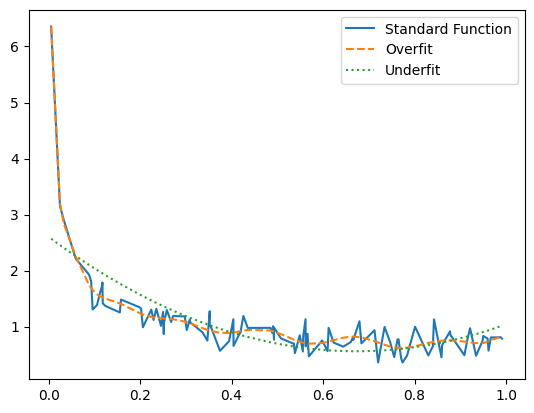

<Figure size 300x500 with 0 Axes>

In [109]:
plt.plot(x,y, label="Standard Function")
plt.plot(x, over_res, label="Overfit", linestyle="--")
plt.plot(x, under_res, label="Underfit", linestyle=":")
plt.legend()
plt.figure(figsize=(3,5))

In [110]:
underfit_var = np.var(under_res)
overfit_var = np.var(over_res)

In [111]:
def mse(x,y):
    return ((x-y)**2).mean()

In [112]:
underfit_mse = mse(x, under_res)
overfit_mse = mse(x, over_res) 

In [113]:
underfit_var, underfit_mse

(0.27113389662679543, 0.865486001401128)

In [114]:
overfit_var, overfit_mse

(0.4620471227056897, 1.0563987902810286)

We see that the underfitting leads to lower variance (which is expected) and we see greater bias through the mean squared error estimator of the overfit polynomial. 